In [ ]:
from google.colab import drive
#connection a google drive pour lire les fichiers
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import essentiels
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl

In [ ]:
import pandas as pd
#lecture du fichier texte (nom du fichier à changer en fonction du match à analyser)
data=pd.read_csv('/content/drive/MyDrive/Etude Technique/L1 J20 MHSC ASM 0.3 à 2.3/L1 J20 MHSC ASM 2-3 FRAN_RAW_GAME_OPT_TGV_25FPS�2248184.txt', engine='python', sep=';', header=None)

# Création du Dataset

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1610740800000,"0,1,0:0,347718,3,32.978,44.448","0,471068,14,43.868,37.283","0,540100,9,51.976,24.648","0,600927,5,30.973,30.483","0,615385,12,38.538,31.151","0,656168,25,47.176,25.263","0,831112,10,52.01,42.866","0,838039,6,37.614,51.2","0,970136,7,41.195,11.364","0,1064775,31,33.233,23.638","1,551190,9,52.614,33.988","1,558169,29,57.29,9.597","1,568624,31,52.318,15.926","1,745104,3,69.499,27.118","1,831143,26,53.348,12.015","1,952280,12,66.597,44.097","1,996147,8,62.275,31.474","1,1128241,37,53.304,43.588","1,1128246,32,72.778,35.935","1,1133611,22,61.947,29.136","3,831313,1,8.488,33.149","4,558155,40,102.813,34.129",":52.69,33.23,0",NaN
1,1610740800040,"40,1,0:0,347718,3,32.979,44.448","0,471068,14,43.908,37.293","0,540100,9,52.001,24.597","0,600927,5,30.974,30.485","0,615385,12,38.531,31.087","0,656168,25,47.239,25.305","0,831112,10,52.047,42.824","0,838039,6,37.706,51.449","0,970136,7,41.117,11.353","0,1064775,31,33.215,23.617","1,551190,9,52.558,33.95","1,558169,29,57.032,9.16","1,568624,31,52.182,15.895","1,745104,3,69.479,27.087","1,831143,26,53.202,12.048","1,952280,12,66.57,44.086","1,996147,8,62.256,31.448","1,1128241,37,53.303,43.572","1,1128246,32,72.768,35.964","1,1133611,22,61.832,29.167","3,831313,1,8.488,33.121","4,558155,40,102.634,34.168",":53.21,33.57,0",NaN
2,1610740800080,"80,1,0:0,347718,3,32.98,44.445","0,471068,14,43.949,37.305","0,540100,9,52.025,24.547","0,600927,5,30.974,30.489","0,615385,12,38.525,31.022","0,656168,25,47.303,25.347","0,831112,10,52.085,42.782","0,838039,6,37.793,51.677","0,970136,7,41.04,11.342","0,1064775,31,33.197,23.597","1,551190,9,52.5,33.911","1,558169,29,56.785,8.759","1,568624,31,52.045,15.865","1,745104,3,69.46,27.057","1,831143,26,53.056,12.08","1,952280,12,66.542,44.076","1,996147,8,62.236,31.424","1,1128241,37,53.305,43.549","1,1128246,32,72.759,35.993","1,1133611,22,61.716,29.191","3,831313,1,8.492,33.096","4,558155,40,102.46,34.202",":53.73,33.9,0",NaN
3,1610740800120,"120,1,0:0,347718,3,32.981,44.441","0,471068,14,43.99,37.319","0,540100,9,52.048,24.497","0,600927,5,30.972,30.493","0,615385,12,38.519,30.958","0,656168,25,47.366,25.39","0,831112,10,52.122,42.741","0,838039,6,37.873,51.883","0,970136,7,40.963,11.331","0,1064775,31,33.178,23.577","1,551190,9,52.442,33.873","1,558169,29,56.546,8.391","1,568624,31,51.908,15.837","1,745104,3,69.442,27.027","1,831143,26,52.91,12.112","1,952280,12,66.514,44.067","1,996147,8,62.216,31.403","1,1128241,37,53.308,43.519","1,1128246,32,72.748,36.022","1,1133611,22,61.599,29.209","3,831313,1,8.497,33.075","4,558155,40,102.29,34.233",":54.25,34.23,0",NaN
4,1610740800160,"160,1,0:0,347718,3,32.982,44.435","0,471068,14,44.032,37.335","0,540100,9,52.071,24.45","0,600927,5,30.969,30.497","0,615385,12,38.514,30.894","0,656168,25,47.43,25.433","0,831112,10,52.16,42.7","0,838039,6,37.948,52.068","0,970136,7,40.887,11.32","0,1064775,31,33.159,23.557","1,551190,9,52.383,33.834","1,558169,29,56.317,8.057","1,568624,31,51.768,15.811","1,745104,3,69.423,26.997","1,831143,26,52.763,12.142","1,952280,12,66.487,44.059","1,996147,8,62.194,31.384","1,1128241,37,53.314,43.483","1,1128246,32,72.738,36.05","1,1133611,22,61.481,29.22","3,831313,1,8.506,33.058","4,558155,40,102.126,34.258",":54.25,34.23,0",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145599,1610747404920,"3004920,2,0:0,347718,3,70.687,38.133","0,540100,9,44.395,27.789","0,600813,11,53.722,31.519","0,600927,5,82.68,8.447","0,656168,25,49.211,44.234","0,838039,6,63.925,4.315","0,897419,19,54.298,3.757","0,1064775,31,51.315,59.08","0,1162824,13,64.098,16.916","0,1260555,33,44.555,22.605","1,461407,10,79.014,6.547","1,558169,29,43.692,34.265","1,745104,3,38.586,24.327","1,789520,17,62.23,38.691","1,907039,20,44.365,23.162","1,959015,2,68.361,5.843","1,996147,8,58.692,14.956","1,1128246,32,42.197,18.664","1,1133611,22,52.288,25.576","1,1157525,34,52.215,6.091","3,

In [ ]:
print(data.dtypes)


0       int64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24    float64
dtype: object


In [ ]:

#création des listes contenant a chaque instant la position de chauqe joueur, ainsi que celle du ballon
liste_totale_x=[]
liste_totale_y=[]
liste_ballon_x=[]
liste_ballon_y=[]
for j in range (0,len(data)): #iteration sur tout le dataset
    liste_x=[]
    liste_y=[]

    for i in range (1,len(data.iloc[0])-2): #on parcourt les colonnes 1 à 22
        my_string=data.iloc[j][i]#on selectionne l'élément de chaque colonne
        if type(my_string)==str :
          liste_x.append(float(my_string.split(",")[-2]))#la coordonnée selon la longueur est l'avant dernière si on sépare chaque champs par des virgules
          liste_y.append(float(my_string.split(",")[-1]))#la coordonnée selon la largeur et la dernière de la liste
        else : 
          liste_x.append(0)
          liste_y.append(0)
    liste_totale_x.append(liste_x)
    liste_totale_y.append(liste_y)
    ballon_string=data.iloc[j][23]
    if type(ballon_string)==str :
      liste_ballon_x.append(float(ballon_string.split(",")[-3][1:6]))
      liste_ballon_y.append(float(ballon_string.split(",")[-2]))
    else :
      liste_ballon_x.append(0)
      liste_ballon_y.append(0)



In [ ]:
Time=data[0]
Time
#on crée le datset en ajoutant le temps
d={'X': liste_totale_x,'Y' : liste_totale_y, 'X_ballon': liste_ballon_x, 'Y_ballon' : liste_ballon_y,'Time':Time}
df=pd.DataFrame(d)


In [ ]:
df

,X,Y,X_ballon,Y_ballon,Time
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160
...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040


In [ ]:
df['Score']=0

In [ ]:
#ajout de la colonne score, le Timestamp des buts est à changer en fonction du match
df.loc[df.Time > 1610742240000, 'Score'] = 1
df.loc[df.Time > 1610742900000, 'Score'] = 2
df.loc[df.Time > 1610745360000, 'Score'] = 3
df.loc[df.Time > 1610745540000, 'Score'] = 4
df.loc[df.Time > 1610745840000, 'Score'] = 5
df

,X,Y,X_ballon,Y_ballon,Time,Score
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0
...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5


In [ ]:
#création du fichier csv
df.to_csv('/content/drive/MyDrive/Etude Technique/dataset_position_MHSC-ASM.csv',index=False)

# Affichage Positions

In [ ]:
import ast
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Etude Technique/dataset_position_MHSC-ASM.csv',converters={0:ast.literal_eval,1:ast.literal_eval})

In [ ]:
dataset

,X,Y,X_ballon,Y_ballon,Time,Score
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0
...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5


In [ ]:
dataset.loc[dataset.Score ==1]

,X,Y,X_ballon,Y_ballon,Time,Score
36001,"[20.208, 29.097, 23.711, 19.066, 30.579, 40.14...","[40.672, 31.041, 24.741, 32.948, 28.588, 29.31...",20.25,33.46,1610742240040,1
36002,"[20.25, 29.146, 23.782, 19.107, 30.623, 40.172...","[40.695, 31.021, 24.703, 32.937, 28.58, 29.314...",20.31,33.46,1610742240080,1
36003,"[20.291, 29.196, 23.854, 19.148, 30.666, 40.20...","[40.716, 31.001, 24.664, 32.926, 28.572, 29.31...",20.36,33.46,1610742240120,1
36004,"[20.332, 29.246, 23.925, 19.189, 30.709, 40.22...","[40.736, 30.981, 24.624, 32.915, 28.563, 29.32...",20.41,33.46,1610742240160,1
36005,"[20.372, 29.297, 23.996, 19.23, 30.751, 40.256...","[40.754, 30.961, 24.584, 32.903, 28.553, 29.33...",20.46,33.46,1610742240200,1
...,...,...,...,...,...,...
52496,"[33.615, 43.571, 52.889, 34.79, 38.968, 52.506...","[49.405, 35.168, 33.315, 33.259, 34.912, 43.62...",40.95,32.34,1610742899840,1
52497,"[33.608, 43.569, 52.887, 34.789, 38.971, 52.50...","[49.368, 35.172, 33.319, 33.235, 34.949, 43.62...",40.99,32.34,1610742899880,1
52498,"[33.6, 43.567, 52.886, 34.789, 38.975, 52.505,...","[49.331, 35.177, 33.324, 33.209, 34.985, 43.63...",41.03,32.35,1610742899920,1
52499,"[33.593, 43.565, 52.885, 34.788, 38.979, 52.50...","[49.296, 35.184, 33.33, 33.18, 35.02, 43.639, ...",41.07,32.35,1610742899960,1


In [ ]:
dataset.dtypes

X            object
Y            object
X_ballon    float64
Y_ballon    float64
Time          int64
Score         int64
dtype: object

In [ ]:
pip install celluloid

In [ ]:
# import all packages and set plots to be embedded inline

# !pip install celluloid   # Run this line in google colab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera

%matplotlib inline
np.set_printoptions(precision=2,suppress=True)
np.random.seed(42)

In [ ]:
#affichage des positions instants après instants
# Set up the graph using Matplotlib
fig, ax = plt.subplots(figsize=(8,4))
img = plt.imread("/content/drive/MyDrive/Etude Technique/background.jpg")
ax.imshow(img, extent=[0, 110, 0, 70])

# Initiate camera
camera = Camera(fig)

# Create individual frames
for i in range(51200,51400):

    ax.imshow(img, extent=[-6, 110, -2, 70])
    # Projectile's trajectory
    x = dataset.iloc[i][0][0:10]
    y = dataset.iloc[i][1][0:10]
    w = dataset.iloc[i][0][10:20]
    z = dataset.iloc[i][1][10:20]
    a = dataset.iloc[i][0][20:22]
    b = dataset.iloc[i][1][20:22]
    #scatter plot
    ax.scatter(x, y, color='blue')
    ax.scatter(w, z, color='red')
    ax.scatter(a, b, color='black')
    ax.scatter(dataset.iloc[i][2],dataset.iloc[i][3],color='white')
    
    # Capture frame
    camera.snap()

# Stop the static plot from displaying
plt.close()


In [ ]:
# Create animation
anim = camera.animate(interval = 40, repeat = True, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())

In [ ]:
anim.save('/content/drive/MyDrive/Etude Technique/position.mp4')

# MAJ Dataset

In [ ]:
import pandas as pd
import ast
dataset=pd.read_csv('/content/drive/MyDrive/Etude Technique/dataset_position_MHSC-ASM.csv',converters={0:ast.literal_eval,1:ast.literal_eval})

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
from operator import itemgetter
from math import sqrt
#création de focntions qui permettent de simplifier les calculs
from math import sqrt
def explode_xy(xy): 
    xl=[]
    yl=[]
    for i in range(len(xy)):
        xl.append(xy[i][0])
        yl.append(xy[i][1])
    return xl,yl

def shoelace_area(x_list,y_list):#calcul de la surface d'un polygone
    a1,a2=0,0
    x_list.append(x_list[0])
    y_list.append(y_list[0])
    for j in range(len(x_list)-1):
        a1 += x_list[j]*y_list[j+1]
        a2 += y_list[j]*x_list[j+1]
    l=abs(a1-a2)/2
    return l

def distance(x1, y1, x2, y2):
   return sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))

def perimeter(points):
   N = len(points)
   firstx, firsty = points[0]
   prevx, prevy = firstx, firsty
   res = 0

   for i in range(1, N):
      nextx, nexty = points[i]
      res = res + distance(prevx,prevy,nextx,nexty)
      prevx = nextx
      prevy = nexty
   res = res + distance(prevx,prevy,firstx,firsty)
   return res



In [ ]:
#on ajoute la possession au dataset
possession=[]
mhsc=[0,1,2,3,4,5,6,7,8,9,20]
asm=[10,11,12,13,14,15,16,17,18,19,21]
for j in range(len(dataset)):
  a=-1
  distance_min=1000
  for i in range(22):
    dist=distance(dataset['X'][j][i],dataset['Y'][j][i],dataset['X_ballon'][j],dataset['Y_ballon'][j])
    if dist<distance_min:
      a=i
      distance_min=dist
  if a in mhsc and distance_min<=1:
    possession.append(0)
  elif a in asm and distance_min<=1:
    possession.append(1)
  else : 
    possession.append(possession[-1])

In [ ]:
len(possession)
dataset['Possession']=possession
dataset

,X,Y,X_ballon,Y_ballon,Time,Score,Possession
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1
...,...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5,0


In [ ]:
dataset.loc[dataset['Possession']==1]

,X,Y,X_ballon,Y_ballon,Time,Score,Possession
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1
...,...,...,...,...,...,...,...
144221,"[84.691, 56.692, 71.649, 84.826, 57.315, 78.49...","[58.575, 55.525, 61.801, 45.833, 42.399, 39.12...",85.85,59.05,1610747349800,5,1
144222,"[84.779, 56.714, 71.757, 84.914, 57.317, 78.56...","[58.62, 55.574, 61.841, 45.885, 42.43, 39.148,...",85.89,58.99,1610747349840,5,1
144223,"[84.862, 56.735, 71.866, 85.0, 57.32, 78.638, ...","[58.665, 55.624, 61.876, 45.938, 42.461, 39.17...",85.91,58.97,1610747349880,5,1
144224,"[84.938, 56.757, 71.978, 85.084, 57.323, 78.70...","[58.712, 55.673, 61.904, 45.993, 42.491, 39.19...",85.92,58.95,1610747349920,5,1


In [ ]:
#ajout d'une colonne minute
minutes = np.linspace(0, 95,len(dataset))
dataset['Minutes']=minutes

In [ ]:
dataset['Mi-Temps']=1
dataset.loc[dataset.Time >= 1610744400000, 'Mi-Temps'] = 2
dataset

,X,Y,X_ballon,Y_ballon,Time,Score,Possession,Minutes,Mi-Temps
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1,0.000000,1
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1,0.000652,1
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1,0.001305,1
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1,0.001957,1
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1,0.002610,1
...,...,...,...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0,94.997390,2
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0,94.998043,2
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0,94.998695,2
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5,0,94.999348,2


# Cellules de Voronoi (Plot)

In [ ]:
dataset

,X,Y,X_ballon,Y_ballon,Time,Score,Possession,Minutes,Mi-Temps
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1,0.000000,1
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1,0.000652,1
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1,0.001305,1
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1,0.001957,1
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1,0.002610,1
...,...,...,...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0,94.997390,2
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0,94.998043,2
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0,94.998695,2
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5,0,94.999348,2


In [ ]:

def voronoi_finite_polygons_2d(vor, radius=None):
    """Reconstruct infinite Voronoi regions in a
    2D diagram to finite regions.
    Source:
    [https://stackoverflow.com/a/20678647/1595060](https://stackoverflow.com/a/20678647/1595060)
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a
    # given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points,
                                  vor.ridge_vertices):
        all_ridges.setdefault(
            p1, []).append((p2, v1, v2))
        all_ridges.setdefault(
            p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an
            # infinite ridge
            t = vor.points[p2] - \
                vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]]. \
                mean(axis=0)
            direction = np.sign(
                np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + \
                direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # Sort region counterclockwise.
        vs = np.asarray([new_vertices[v]
                         for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(
            vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[
            np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
#Voronoi à l'instant 0
pos_x=dataset['X'][0]
pos_y=dataset['Y'][0]
vor = Voronoi(np.c_[pos_x,pos_y])
regions, vertices = voronoi_finite_polygons_2d(vor)

In [ ]:
#création des cellules de voronoi
cells = [(vertices[region])
         for region in regions]

In [ ]:
cells

[array([[40.60358774, 44.17974989],
        [ 7.8857923 , 66.64416038],
        [20.59409721, 39.09956463],
        [34.19658652, 37.14661146],
        [36.65158149, 38.17314166]]), array([[44.05920049, 45.73262782],
        [49.21325559, 38.21618207],
        [46.72186081, 31.60321128],
        [44.81411134, 31.07818339],
        [36.65158149, 38.17314166],
        [40.60358774, 44.17974989]]), array([[50.15368611, 29.46426962],
        [48.96184644, 20.16210634],
        [59.7993873 , 20.58705921],
        [55.98293355, 29.06608334]]), array([[34.19658652, 37.14661146],
        [20.59409721, 39.09956463],
        [18.63959367, 22.61531398],
        [35.00266644, 28.01787709]]), array([[36.65158149, 38.17314166],
        [34.19658652, 37.14661146],
        [35.00266644, 28.01787709],
        [40.21792188, 24.33533614],
        [44.81411134, 31.07818339]]), array([[50.15368611, 29.46426962],
        [46.72186081, 31.60321128],
        [44.81411134, 31.07818339],
        [40.21792188, 2

In [ ]:
#redimensionner les cellules pour les limiter au terrain
def reshape_cells(cellules): 
  for i in range(len(cellules)):
    for j in range(len(cellules[i])):
      if cellules[i][j][1]>70 :
        cellules[i][j][1]=70
      if cellules[i][j][1]<0 :
        cellules[i][j][1]=0
      if cellules[i][j][0]>110 :
        cellules[i][j][0]=110
      if cellules[i][j][0]<0 :
        cellules[i][j][0]=0

reshape_cells(cells)
cells

[array([[40.60358774, 44.17974989],
        [ 7.8857923 , 66.64416038],
        [20.59409721, 39.09956463],
        [34.19658652, 37.14661146],
        [36.65158149, 38.17314166]]), array([[44.05920049, 45.73262782],
        [49.21325559, 38.21618207],
        [46.72186081, 31.60321128],
        [44.81411134, 31.07818339],
        [36.65158149, 38.17314166],
        [40.60358774, 44.17974989]]), array([[50.15368611, 29.46426962],
        [48.96184644, 20.16210634],
        [59.7993873 , 20.58705921],
        [55.98293355, 29.06608334]]), array([[34.19658652, 37.14661146],
        [20.59409721, 39.09956463],
        [18.63959367, 22.61531398],
        [35.00266644, 28.01787709]]), array([[36.65158149, 38.17314166],
        [34.19658652, 37.14661146],
        [35.00266644, 28.01787709],
        [40.21792188, 24.33533614],
        [44.81411134, 31.07818339]]), array([[50.15368611, 29.46426962],
        [46.72186081, 31.60321128],
        [44.81411134, 31.07818339],
        [40.21792188, 2

In [ ]:
mhsc=[0,1,2,3,4,5,6,7,8,9,20]
asm=[10,11,12,13,14,15,16,17,18,19,21]


import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl

districts = np.zeros(22, dtype=np.int32)
districts[asm] = 1
districts[mhsc] = 0
cmap = plt.cm.Set3
# We generate colors for districts using a color map.
colors_districts = cmap(
    np.linspace(0., 1., 2))[:, :3]
# The color of every polygon, grey by default.
colors = .25 * np.ones((len(districts), 3))
# We give each polygon in Paris the color of
# its district.
colors[asm] = colors_districts[districts[asm]]
colors[mhsc] = colors_districts[districts[mhsc]]
asm_x=dataset['X'][0][10:20]
asm_y=dataset['Y'][0][10:20]
mhsc_x=dataset['X'][0][0:10]
mhsc_y=dataset['Y'][0][0:10]
asm_x.append(dataset['X'][0][21])
asm_y.append(dataset['Y'][0][21])
mhsc_x.append(dataset['X'][0][20])
mhsc_y.append(dataset['Y'][0][20])

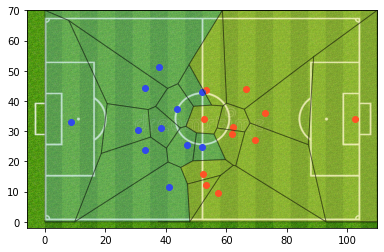

In [ ]:

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,4))
img = plt.imread("/content/drive/MyDrive/Etude Technique/background.jpg")
ax.imshow(img, extent=[-6, 110, -2, 70])
ax.scatter(asm_x, asm_y,color='red')
ax.scatter(mhsc_x, mhsc_y, color='blue')
ax.add_collection(
    mpl.collections.PolyCollection(
        cells, facecolors=colors,
        edgecolors='k', alpha=.35))



# Analyse des cellules de Voronoi

In [ ]:
#fonction pour calculer l'aire et la surface des cellules de voronoi d'une equipe
def voronoi_param(liste):
  mes_perim=[]
  mes_area=[]
  for j in range(len(dataset)):
    #if j ==94284 :
      #continue
    vor=Voronoi(np.c_[dataset['X'][j],dataset['Y'][j]])
    regions, vertices = voronoi_finite_polygons_2d(vor)
    cells = [(vertices[region])
         for region in regions]
    reshape_cells(cells)
    perim=0
    area=0

    for i in liste:
      a,b=explode_xy(cells[i])
      area+=shoelace_area(a,b)
      perim+=perimeter(cells[i])

    mes_perim.append(perim)
    mes_area.append(area)


  return mes_area,mes_perim

In [ ]:
area_asm,perim_asm=voronoi_param(asm)

In [ ]:
area_mhsc,perim_mhsc=voronoi_param(mhsc)

In [ ]:
dataset_voronoi=dataset.copy()
dataset_voronoi

,X,Y,X_ballon,Y_ballon,Time,Score,Possession,Minutes,Mi-Temps
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1,0.000000,1
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1,0.000652,1
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1,0.001305,1
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1,0.001957,1
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1,0.002610,1
...,...,...,...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0,94.997390,2
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0,94.998043,2
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0,94.998695,2
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5,0,94.999348,2


In [ ]:
dataset_voronoi['Aire ASM']=area_asm
dataset_voronoi['Aire Mhsc']=area_mhsc

In [ ]:
area_asm=pd.Series(area_asm)
area_mhsc=pd.Series(area_mhsc)

In [ ]:
window_size=4000
area_asm=area_asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
area_mhsc=area_mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()

In [ ]:
buts_asm=[1610742240000,1610742900000,1610745360000]
buts_mhsc=[1610745540000,1610745840000]


In [ ]:
#création d'une focntion pour tracer chacune des courbes en fonction du temps
def plot_graphs_voronoi(mon_dataset,size,equipe):

  fig = plt.figure()
  ax = plt.axes()
  x=mon_dataset['Minutes']
  area_asm=mon_dataset['Aire ASM']
  area_mhsc=mon_dataset['Aire Mhsc']
  window_size=size
  area_asm=area_asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  area_mhsc=area_mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  ax.set_xlabel('Minutes')
  ax.set_ylabel('Surface')
  ax.set_title('Evolution de la surface des cellules de Voronoi')
  plt.plot(x,area_asm, color='tomato')
  plt.plot(x,area_mhsc, color='dodgerblue')
  plt.legend(['Monaco', 'Montpellier'])
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],2000,5000,color='navy')
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],2000,5000,color='firebrick')
  txt="Possession : " + equipe
  plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

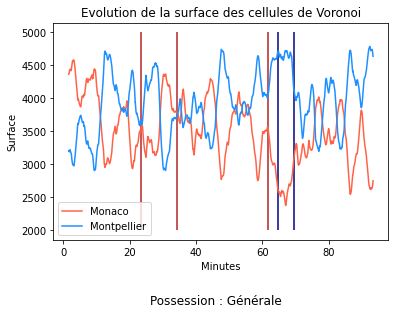

In [ ]:
plot_graphs_voronoi(dataset_voronoi,5000,'Générale')

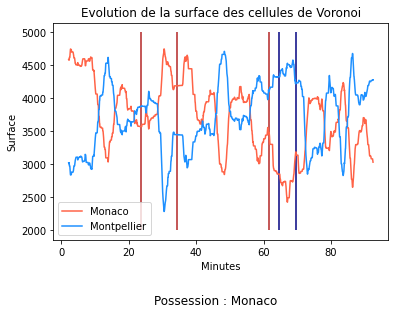

In [ ]:
dataset_asm=dataset_voronoi.loc[dataset_voronoi['Possession'] == 1]
plot_graphs_voronoi(dataset_asm,3000,'Monaco')

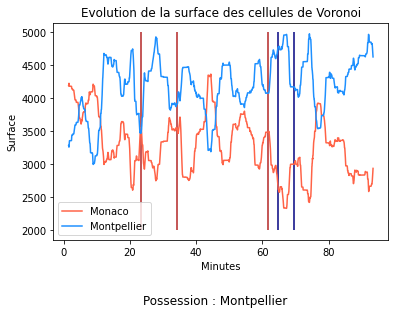

In [ ]:
dataset_mhsc=dataset_voronoi.loc[dataset_voronoi['Possession'] == 0]
plot_graphs_voronoi(dataset_mhsc,3000,'Montpellier')

In [ ]:
len(dataset_asm)/len(dataset)

0.5061056014944645

# Analyse des directions de courses

In [ ]:
import statistics
#vitesse calculée selon la longueur uniquement
liste_vitesse_asm=[]
liste_vitesse_mhsc=[]
for i in range(len(dataset)-1):
  if dataset['Mi-Temps'][i]==1 and dataset['Mi-Temps'][i+1]==1:
    liste_asm=-np.subtract(np.array(dataset['X'][i+1][10:20]),np.array(dataset['X'][i][10:20]))/(np.subtract(np.array(dataset['Time'][i+1]),np.array(dataset['Time'][i]))/1000)
    liste_vitesse_asm.append([min(liste_asm),max(liste_asm),np.mean(liste_asm),statistics.median(liste_asm),statistics.pstdev(liste_asm)])

    liste_mhsc=np.subtract(np.array(dataset['X'][i+1][0:10]),np.array(dataset['X'][i][0:10]))/(np.subtract(np.array(dataset['Time'][i+1]),np.array(dataset['Time'][i]))/1000)
    liste_vitesse_mhsc.append([min(liste_mhsc),max(liste_mhsc),statistics.mean(liste_mhsc),statistics.median(liste_mhsc),statistics.pstdev(liste_mhsc)])
  elif dataset['Mi-Temps'][i]==2 and dataset['Mi-Temps'][i+1]==2:
    liste_asm=np.subtract(np.array(dataset['X'][i+1][10:20]),np.array(dataset['X'][i][10:20]))/(np.subtract(np.array(dataset['Time'][i+1]),np.array(dataset['Time'][i]))/1000)
    liste_vitesse_asm.append([min(liste_asm),max(liste_asm),np.mean(liste_asm),statistics.median(liste_asm),statistics.pstdev(liste_asm)])
    
    liste_mhsc=-np.subtract(np.array(dataset['X'][i+1][0:10]),np.array(dataset['X'][i][0:10]))/(np.subtract(np.array(dataset['Time'][i+1]),np.array(dataset['Time'][i]))/1000)
    liste_vitesse_mhsc.append([min(liste_mhsc),max(liste_mhsc),statistics.mean(liste_mhsc),statistics.median(liste_mhsc),statistics.pstdev(liste_mhsc)])
  else :
    continue  




In [ ]:
len(liste_vitesse_asm)

145602

In [ ]:
dataset_vitesse_asm=pd.DataFrame(liste_vitesse_asm, columns=['min_vitesse_asm','max_vitesse_asm','moyenne_vitesse_asm','mediane_vitesse_asm','ecart-type_asm'])

dataset_vitesse_mhsc=pd.DataFrame(liste_vitesse_mhsc, columns=['min_vitesse_mhsc','max_vitesse_mhsc','moyenne_vitesse_mhsc','mediane_vitesse_mhsc','ecart-type_mhsc'])

In [ ]:
dataset_vitesse=dataset.drop([0,len(dataset)-1])

In [ ]:
dataset_vitesse=dataset_vitesse.reset_index(drop=True)

In [ ]:
dataset_vitesse=pd.concat([dataset_vitesse,dataset_vitesse_mhsc,dataset_vitesse_asm],axis=1)

In [ ]:
dataset_vitesse

,X,Y,X_ballon,Y_ballon,Time,Score,Possession,Minutes,Mi-Temps,min_vitesse_mhsc,max_vitesse_mhsc,moyenne_vitesse_mhsc,mediane_vitesse_mhsc,ecart-type_mhsc,min_vitesse_asm,max_vitesse_asm,moyenne_vitesse_asm,mediane_vitesse_asm,ecart-type_asm
0,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1,0.000652,1,-1.950,2.300,0.3900,0.3250,1.119498,0.025,6.450,1.9700,1.0375,1.972207
1,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1,0.001305,1,-1.925,2.175,0.3850,0.3125,1.097850,-0.050,6.175,1.9450,1.0750,1.920540
2,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1,0.001957,1,-1.925,2.000,0.3525,0.3000,1.069197,-0.075,5.975,1.9275,1.0750,1.878379
3,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1,0.002610,1,-1.900,1.875,0.3500,0.3000,1.050892,-0.150,5.725,1.9125,1.0750,1.841238
4,"[32.984, 44.075, 52.094, 30.965, 38.508, 47.49...","[44.427, 37.353, 24.403, 30.502, 30.829, 25.47...",54.56,34.41,1610740800200,0,1,0.003262,1,-1.875,1.700,0.3300,0.3125,1.023279,-0.175,5.500,1.8925,1.0875,1.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145597,"[70.703, 44.473, 53.729, 82.774, 49.194, 64.04...","[38.121, 27.764, 31.523, 8.363, 44.234, 4.245,...",27.67,42.40,1610747404880,5,0,94.996738,2,-0.425,3.150,1.2425,1.1000,1.256436,-5.475,-1.000,-2.5450,-2.0375,1.466450
145598,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0,94.997390,2,-0.425,3.125,1.2275,1.0750,1.242802,-5.525,-0.900,-2.5250,-2.0250,1.489799
145599,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0,94.998043,2,-0.425,3.100,1.2100,1.0250,1.234565,-5.525,-0.775,-2.4875,-2.0000,1.508611
145600,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0,94.998695,2,-0.475,3.075,1.1850,1.0125,1.231219,-5.550,-0.725,-2.4725,-1.9750,1.521325


In [ ]:
def plot_graphs_vitesse(mon_dataset,size,col1,col2,cara, equipe,min,max):

  fig = plt.figure()
  ax = plt.axes()
  x=mon_dataset['Minutes']
  asm=mon_dataset[col1]
  mhsc=mon_dataset[col2]
  window_size=size
  asm=asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  mhsc=mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  ax.set_xlabel('Minutes')
  ax.set_ylabel('Vitesse')
  ax.set_title('Evolution de la vitesse des equipes')
  plt.plot(x,asm, color='tomato')
  plt.plot(x,mhsc, color='dodgerblue')
  plt.legend(['Monaco', 'Montpellier'])
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],min,max,color='navy')
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],min,max,color='firebrick')
  txt="Vitesse " + cara + "  Possession : " + equipe

  plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

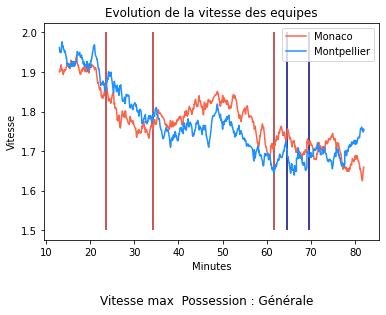

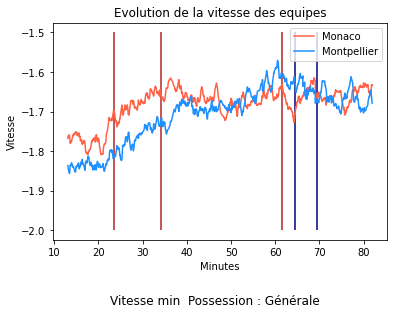

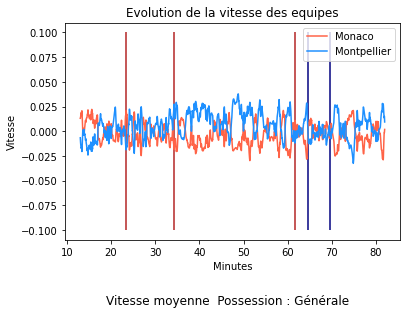

In [ ]:
plot_graphs_vitesse(dataset_vitesse,40000,'max_vitesse_mhsc','max_vitesse_asm','max', 'Générale',1.5,2)
plot_graphs_vitesse(dataset_vitesse,40000,'min_vitesse_mhsc','min_vitesse_asm','min', 'Générale',-2,-1.5)
plot_graphs_vitesse(dataset_vitesse,40000,'moyenne_vitesse_mhsc','moyenne_vitesse_asm','moyenne', 'Générale',-0.1,0.1)

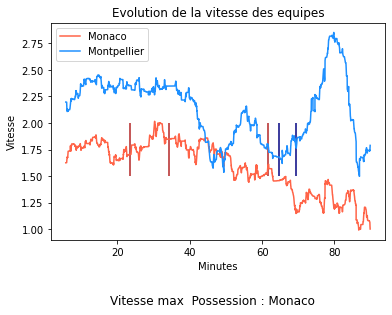

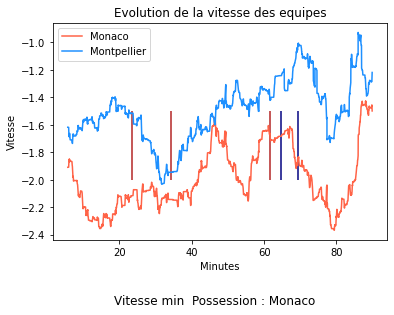

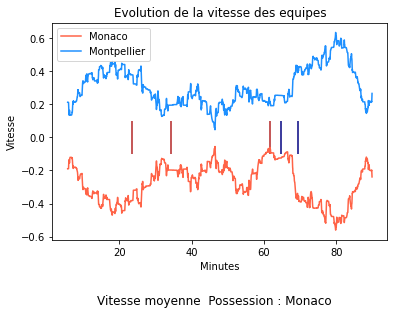

In [ ]:
graphe_asm=dataset_vitesse.loc[dataset_vitesse['Possession'] == 1]
plot_graphs_vitesse(graphe_asm,8000,'max_vitesse_mhsc','max_vitesse_asm','max', 'Monaco',1.5,2)
plot_graphs_vitesse(graphe_asm,8000,'min_vitesse_mhsc','min_vitesse_asm','min', 'Monaco',-2,-1.5)
plot_graphs_vitesse(graphe_asm,8000,'moyenne_vitesse_mhsc','moyenne_vitesse_asm','moyenne', 'Monaco',-0.1,0.1)

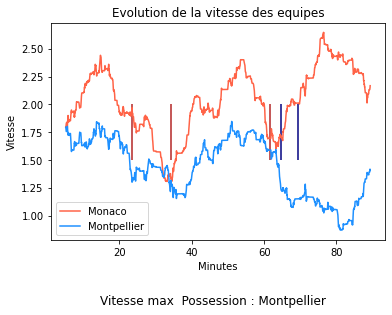

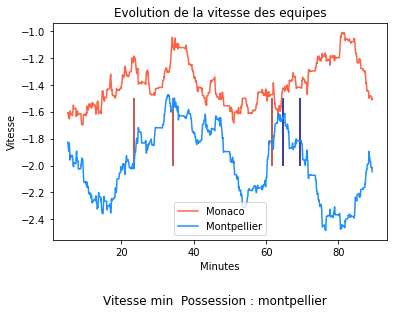

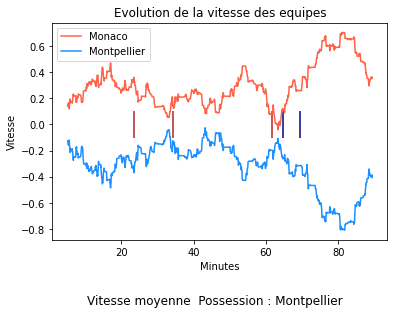

In [ ]:
graphe_mhsc=dataset_vitesse.loc[dataset_vitesse['Possession'] == 0]
plot_graphs_vitesse(graphe_mhsc,8000,'max_vitesse_mhsc','max_vitesse_asm','max', 'Montpellier',1.5,2)
plot_graphs_vitesse(graphe_mhsc,8000,'min_vitesse_mhsc','min_vitesse_asm','min', 'montpellier',-2,-1.5)
plot_graphs_vitesse(graphe_mhsc,8000,'moyenne_vitesse_mhsc','moyenne_vitesse_asm','moyenne', 'Montpellier',-0.1,0.1)

# Calcul de la postion du centroid de chacune des deux équipes

In [ ]:
but1=[0,34]
but2=[105,34]
centroids_asm=[]
centroids_mhsc=[]
for i in range(len(dataset)):
  pp=np.c_[dataset['X'][i],dataset['Y'][i]]
  pp_asm=pp[10:20]
  pp_mhsc=pp[0:10]
  cent_asm=[sum([p[0] for p in pp_asm])/len(pp_asm),sum([p[1] for p in pp_asm])/len(pp_asm)]
  cent_mhsc=[sum([p[0] for p in pp_mhsc])/len(pp_mhsc),sum([p[1] for p in pp_mhsc])/len(pp_mhsc)]
  if dataset['Mi-Temps'][i]==1:
    centroids_asm.append(distance(cent_asm[0],cent_asm[1],but2[0],but2[1]))
    centroids_mhsc.append(distance(cent_mhsc[0],cent_mhsc[1],but1[0],but1[1]))
  else :
    centroids_asm.append(distance(cent_asm[0],cent_asm[1],but1[0],but1[1]))
    centroids_mhsc.append(distance(cent_mhsc[0],cent_mhsc[1],but2[0],but2[1]))

In [ ]:
dataset_centroids=dataset.copy()
dataset_centroids['centroids_asm']=centroids_asm
dataset_centroids['centroids_mhsc']=centroids_mhsc
dataset_centroids

,X,Y,X_ballon,Y_ballon,Time,Score,Possession,Minutes,Mi-Temps,centroids_asm,centroids_mhsc
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1,0.000000,1,45.165724,40.994139
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1,0.000652,1,45.250194,41.009236
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1,0.001305,1,45.333386,41.024217
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1,0.001957,1,45.415566,41.037977
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1,0.002610,1,45.496892,41.051715
...,...,...,...,...,...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0,94.997390,2,55.991362,47.840513
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0,94.998043,2,55.888616,47.884650
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0,94.998695,2,55.787474,47.928084
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5,0,94.999348,2,55.686913,47.970521


In [ ]:
min(centroids_asm)

7.3629940024422265

In [ ]:
def plot_graphs_centroids(mon_dataset,size,equipe):

  fig = plt.figure()
  ax = plt.axes()
  x=mon_dataset['Minutes']
  asm=mon_dataset['centroids_asm']
  mhsc=mon_dataset['centroids_mhsc']
  window_size=size
  asm=asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  mhsc=mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  ax.set_xlabel('Minutes')
  ax.set_ylabel('Distance')
  ax.set_title('Evolution de la distance entre les joueurs et le but')
  plt.plot(x,asm, color='tomato')
  plt.plot(x,mhsc, color='dodgerblue')
  plt.legend(['Monaco', 'Montpellier'])
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],25,80,color='navy')
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],25,80,color='firebrick')
  txt="Possession : " + equipe
  plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

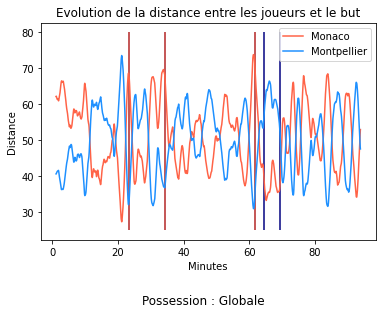

In [ ]:
plot_graphs_centroids(dataset_centroids,3500,'Globale')

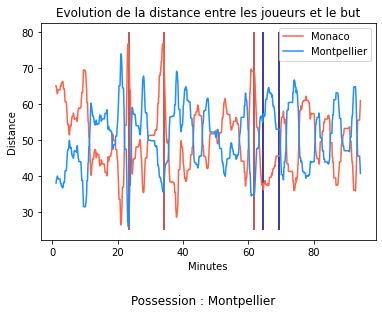

In [ ]:
graphe_mhsc=dataset_centroids.loc[dataset_centroids['Possession'] == 0]
plot_graphs_centroids(graphe_mhsc,2000,'Montpellier')

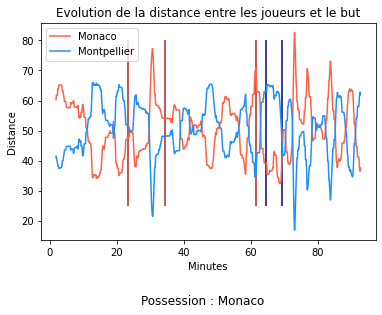

In [ ]:
graphe_asm=dataset_centroids.loc[dataset_centroids['Possession'] == 1]
plot_graphs_centroids(graphe_asm,2000,'Monaco')

# Position dernier defenseur

In [ ]:
but1=[0,34]
but2=[105,34]
defenseur_asm=[]
defenseur_mhsc=[]
for i in range(len(dataset)):
  pp=np.c_[dataset['X'][i],dataset['Y'][i]]
  pp_asm=pp[10:20]
  pp_mhsc=pp[0:10]
  if dataset['Mi-Temps'][i]==1:
    distance_asm=[distance(p[0],p[1],but2[0],but2[1]) for p in pp_asm]
    defenseur_asm.append(min(distance_asm))
    distance_mhsc=[distance(p[0],p[1],but1[0],but1[1]) for p in pp_mhsc]
    defenseur_mhsc.append(min(distance_mhsc))
  else :
    distance_asm=[distance(p[0],p[1],but1[0],but1[1]) for p in pp_asm]
    defenseur_asm.append(min(distance_asm))
    distance_mhsc=[distance(p[0],p[1],but2[0],but2[1]) for p in pp_mhsc]
    defenseur_mhsc.append(min(distance_mhsc))

In [ ]:
dataset_defenseur=dataset
dataset_defenseur['defenseur_asm']=defenseur_asm
dataset_defenseur['defenseur_mhsc']=defenseur_mhsc
dataset_defenseur

,X,Y,X_ballon,Y_ballon,Time,Score,Possession,Minutes,Mi-Temps,defenseur_asm,defenseur_mhsc
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1,0.000000,1,32.280048,31.172039
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1,0.000652,1,32.291781,31.172807
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1,0.001305,1,32.302541,31.172356
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1,0.001957,1,32.315321,31.169919
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1,0.002610,1,32.327065,31.166488
...,...,...,...,...,...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0,94.997390,2,39.779974,33.928428
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0,94.998043,2,39.595647,33.927236
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0,94.998695,2,39.412326,33.926513
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5,0,94.999348,2,39.229069,33.925592


In [ ]:

def plot_graphs_defenseur(mon_dataset,size,equipe):

  fig = plt.figure()
  ax = plt.axes()
  x=mon_dataset['Minutes']
  asm=mon_dataset['defenseur_asm']
  mhsc=mon_dataset['defenseur_mhsc']
  window_size=size
  asm=asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  mhsc=mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  ax.set_xlabel('Minutes')
  ax.set_ylabel('Distance')
  ax.set_title('Evolution de la distance entre le dernier defenseur et le but')
  plt.plot(x,asm, color='tomato')
  plt.plot(x,mhsc, color='dodgerblue')
  plt.legend(['Monaco', 'Montpellier'])
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],0,60,color='navy')
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],0,60,color='firebrick')
  txt="Possession : " + equipe
  plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

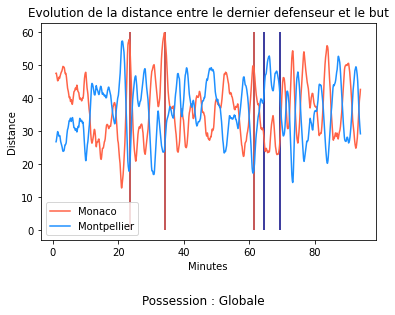

In [ ]:
plot_graphs_defenseur(dataset_defenseur,3000,'Globale')

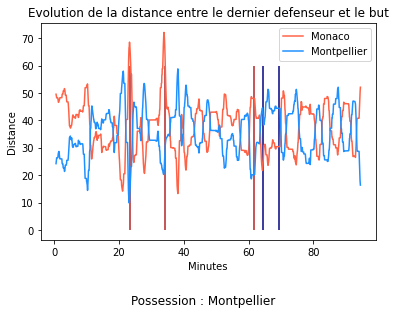

In [ ]:
graphe_mhsc=dataset_defenseur.loc[dataset_defenseur['Possession'] == 0]
plot_graphs_defenseur(graphe_mhsc,1500,'Montpellier')

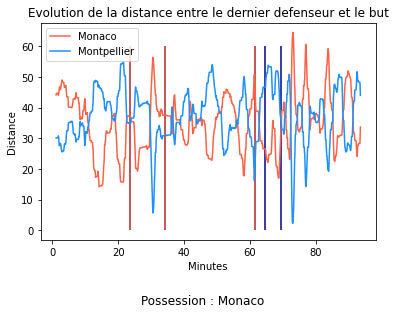

In [ ]:
graphe_asm=dataset_defenseur.loc[dataset_defenseur['Possession'] == 1]
plot_graphs_defenseur(graphe_asm,1500,'Monaco')

# Distance entre joueurs d'une même ligne

In [ ]:
liste_def_asm=[15,18,13,11]
liste_milieu_asm=[17,16,19,14]
liste_attaque_asm=[10,12]
liste_def_mhsc=[7,0,3,9,8]
liste_milieu_mhsc=[1,4,5]
liste_attaque_mhsc=[6,2]

In [ ]:
from itertools import combinations
def centroid (liste):
  centre=[sum([p[0] for p in liste])/len(liste),sum([p[1] for p in liste])/len(liste)]
  return centre
def distance_moyenne_ligne(liste):
  dist= sum(distance(i[0][0],i[0][1],i[1][0],i[1][1]) for i in combinations(liste,2))/sum(1 for ignore in combinations(liste,2))
  return dist

In [ ]:
distance_def_asm=[]
distance_milieu_asm=[]
distance_attaque_asm=[]
distance_def_mhsc=[]
distance_milieu_mhsc=[]
distance_attaque_mhsc=[]
for i in range(len(dataset)):
  liste_pos=np.c_[dataset['X'][i],dataset['Y'][i]]

  liste_pos_def_asm=[liste_pos[i] for i in liste_def_asm]
  liste_pos_milieu_asm=[liste_pos[i] for i in liste_milieu_asm]
  liste_pos_attaque_asm=[liste_pos[i] for i in liste_attaque_asm]
  liste_pos_def_mhsc=[liste_pos[i] for i in liste_def_mhsc]
  liste_pos_milieu_mhsc=[liste_pos[i] for i in liste_milieu_mhsc]
  liste_pos_attaque_mhsc=[liste_pos[i] for i in liste_attaque_mhsc]

  distance_def_asm.append(distance_moyenne_ligne(liste_pos_def_asm))
  distance_milieu_asm.append(distance_moyenne_ligne(liste_pos_milieu_asm))
  distance_attaque_asm.append(distance_moyenne_ligne(liste_pos_attaque_asm))
  distance_def_mhsc.append(distance_moyenne_ligne(liste_pos_def_mhsc))
  distance_milieu_mhsc.append(distance_moyenne_ligne(liste_pos_milieu_mhsc))
  distance_attaque_mhsc.append(distance_moyenne_ligne(liste_pos_attaque_mhsc))


In [ ]:
distances_joueurs=pd.DataFrame(list(zip(distance_def_asm,distance_milieu_asm,distance_attaque_asm,distance_def_mhsc,distance_milieu_mhsc,distance_attaque_mhsc)), columns=["distance_def_asm","distance_milieu_asm","distance_attaque_asm","distance_def_mhsc","distance_milieu_mhsc","distance_attaque_mhsc"])

In [ ]:
dataset_distances_joueurs=pd.concat([dataset,distances_joueurs],axis=1)

In [ ]:
def plot_graphs_distance_joueurs(mon_dataset,localisation,size,equipe):
    fig = plt.figure()
    ax = plt.axes()
    x=mon_dataset['Minutes']
    if localisation == "défense" :
        asm=mon_dataset['distance_def_asm']
        mhsc=mon_dataset['distance_def_mhsc']
    elif localisation == "attaque" :
        asm=mon_dataset['distance_attaque_asm']
        mhsc=mon_dataset['distance_attaque_mhsc']
    else : 
        asm=mon_dataset['distance_milieu_asm']
        mhsc=mon_dataset['distance_milieu_mhsc']
    window_size=size
    asm=asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
    mhsc=mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Distance')
    ax.set_title('Distance entre les joueurs en ' + localisation)
    plt.plot(x,asm, color='tomato')
    plt.plot(x,mhsc, color='dodgerblue')
    plt.legend(['Monaco', 'Montpellier'])
    plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],5,35,color='navy')
    plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],5,35,color='firebrick')
    txt="Possession : " + equipe
    plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

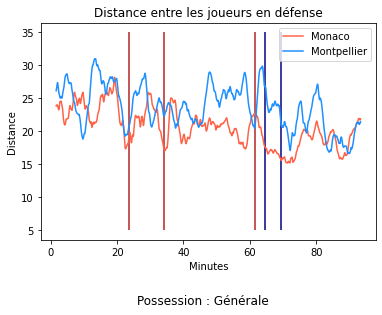

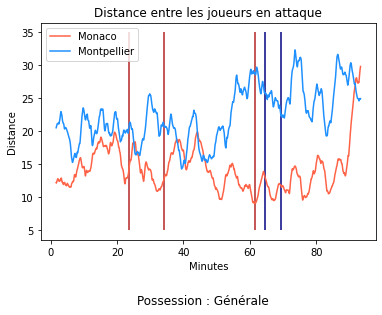

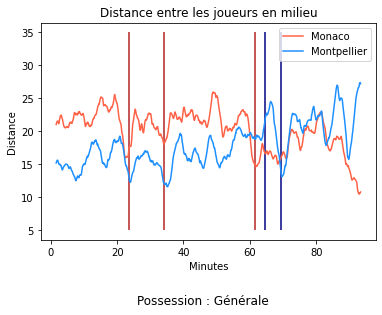

In [ ]:
plot_graphs_distance_joueurs(dataset_distances_joueurs,"défense",5000,"Générale")
plot_graphs_distance_joueurs(dataset_distances_joueurs,"attaque",5000,"Générale")
plot_graphs_distance_joueurs(dataset_distances_joueurs,"milieu",5000,"Générale")

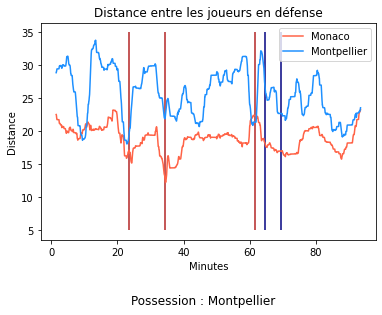

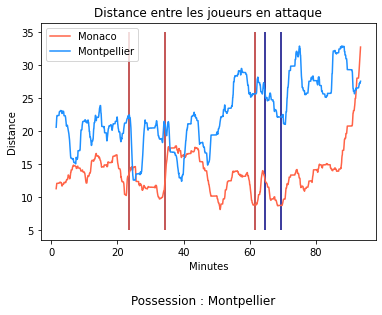

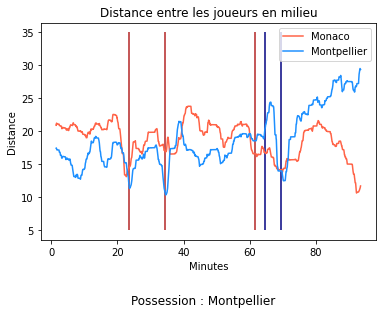

In [ ]:
distances_joueurs_mhsc=dataset_distances_joueurs.loc[dataset_distances_joueurs['Possession'] == 0]
plot_graphs_distance_joueurs(distances_joueurs_mhsc,"défense",3000,"Montpellier")
plot_graphs_distance_joueurs(distances_joueurs_mhsc,"attaque",3000,"Montpellier")
plot_graphs_distance_joueurs(distances_joueurs_mhsc,"milieu",3000,"Montpellier")

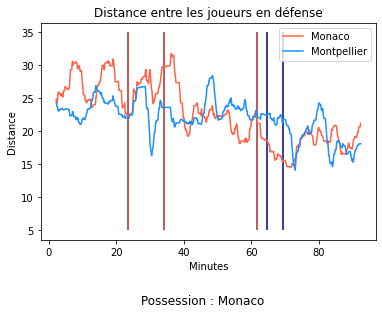

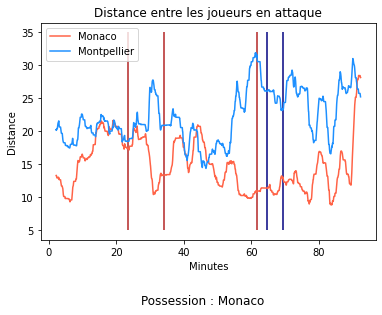

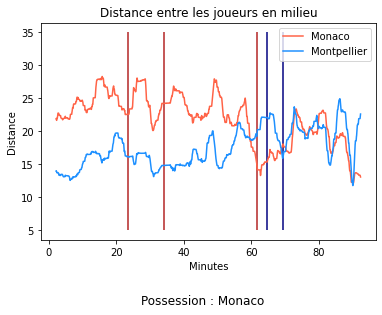

In [ ]:
distances_joueurs_asm=dataset_distances_joueurs.loc[dataset_distances_joueurs['Possession'] == 1]
plot_graphs_distance_joueurs(distances_joueurs_asm,"défense",3000,"Monaco")
plot_graphs_distance_joueurs(distances_joueurs_asm,"attaque",3000,"Monaco")
plot_graphs_distance_joueurs(distances_joueurs_asm,"milieu",3000,"Monaco")

# Distance entre les centroides des lignes

In [ ]:
liste_pos=[]
for i in range(len(dataset)):
    liste_pos.append(np.c_[dataset['X'][i],dataset['Y'][i]])

In [ ]:
liste_pos_def_asm=[]
liste_pos_milieu_asm=[]
liste_pos_attaque_asm=[]
liste_pos_def_mhsc=[]
liste_pos_milieu_mhsc=[]
liste_pos_attaque_mhsc=[]
for i in range(len(liste_pos)):
    liste_pos_def_asm.append([liste_pos[i][j] for j in liste_def_asm])
    liste_pos_milieu_asm.append([liste_pos[i][j] for j in liste_milieu_asm])
    liste_pos_attaque_asm.append([liste_pos[i][j] for j in liste_attaque_asm])
    liste_pos_def_mhsc.append([liste_pos[i][j] for j in liste_def_mhsc])
    liste_pos_milieu_mhsc.append([liste_pos[i][j] for j in liste_milieu_mhsc])
    liste_pos_attaque_mhsc.append([liste_pos[i][j] for j in liste_attaque_mhsc])

In [ ]:
def centroids(liste):
    centres=[]
    for i in range(len(liste)):
        centres.append([sum([p[0] for p in liste[i]])/len(liste[i]), sum([p[1] for p in liste[i]])/len(liste[i])])
    return centres

In [ ]:
centroid_def_asm=centroids(liste_pos_def_asm)
centroid_milieu_asm=centroids(liste_pos_milieu_asm)
centroid_attaque_asm=centroids(liste_pos_attaque_asm)
centroid_def_mhsc=centroids(liste_pos_def_mhsc)
centroid_milieu_mhsc=centroids(liste_pos_milieu_mhsc)
centroid_attaque_mhsc=centroids(liste_pos_attaque_mhsc)

In [ ]:
distance_milieu_def_asm=[]
distance_milieu_attaque_asm=[]
distance_milieu_def_mhsc=[]
distance_milieu_attaque_mhsc=[]
for i in range(len(centroid_milieu_asm)):
    distance_milieu_def_asm.append(distance(centroid_def_asm[i][0],centroid_def_asm[i][1],centroid_milieu_asm[i][0],centroid_milieu_asm[i][1]))
    distance_milieu_attaque_asm.append(distance(centroid_attaque_asm[i][0],centroid_attaque_asm[i][1],centroid_milieu_asm[i][0],centroid_milieu_asm[i][1]))
    distance_milieu_def_mhsc.append(distance(centroid_def_mhsc[i][0],centroid_def_mhsc[i][1],centroid_milieu_mhsc[i][0],centroid_milieu_mhsc[i][1]))
    distance_milieu_attaque_mhsc.append(distance(centroid_attaque_mhsc[i][0],centroid_attaque_mhsc[i][1],centroid_milieu_mhsc[i][0],centroid_milieu_mhsc[i][1]))

In [ ]:
distances_centroids=pd.DataFrame(list(zip(distance_milieu_def_asm,distance_milieu_attaque_asm,distance_milieu_def_mhsc,distance_milieu_attaque_mhsc)), columns=["distance_milieu_def_asm","distance_milieu_attaque_asm","distance_milieu_def_mhsc","distance_milieu_attaque_mhsc"])

In [ ]:
dataset_distances_centroids=pd.concat([dataset,distances_centroids],axis=1)

In [ ]:

def plot_graphs_distance_centroids(mon_dataset,localisation,size,equipe):
    fig = plt.figure()
    ax = plt.axes()
    x=mon_dataset['Minutes']
    if localisation == "la défense" :
        asm=mon_dataset['distance_milieu_def_asm']
        mhsc=mon_dataset['distance_milieu_def_mhsc']
    else :
        asm=mon_dataset['distance_milieu_attaque_asm']
        mhsc=mon_dataset['distance_milieu_attaque_mhsc']
    window_size=size
    asm=asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
    mhsc=mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Distance')
    ax.set_title('Distance entre les centroids du milieu et de ' + localisation)
    plt.plot(x,asm, color='tomato')
    plt.plot(x,mhsc, color='dodgerblue')
    plt.legend(['Monaco', 'Montpellier'])
    plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],0,23,color='navy')
    plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],0,23,color='firebrick')
    txt="Possession : " + equipe
    plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

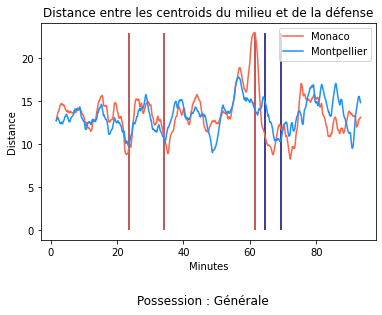

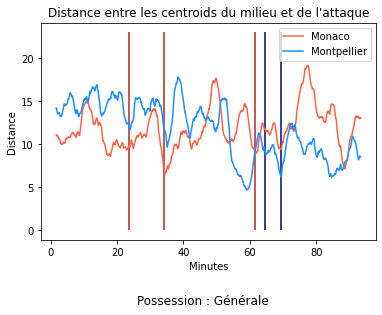

In [ ]:
plot_graphs_distance_centroids(dataset_distances_centroids,"la défense",5000,"Générale")
plot_graphs_distance_centroids(dataset_distances_centroids,"l'attaque",5000,"Générale")

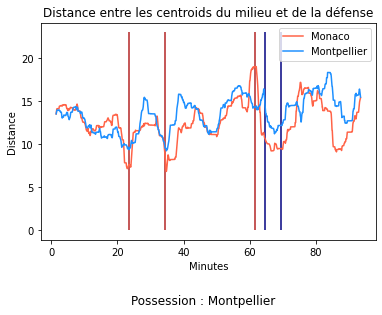

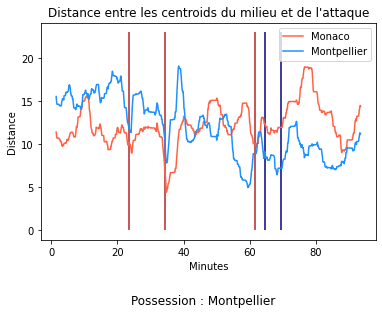

In [ ]:
centroids_mhsc=dataset_distances_centroids.loc[dataset_distances_centroids['Possession'] == 0]
plot_graphs_distance_centroids(centroids_mhsc,"la défense",3000,"Montpellier")
plot_graphs_distance_centroids(centroids_mhsc,"l'attaque",3000,"Montpellier")

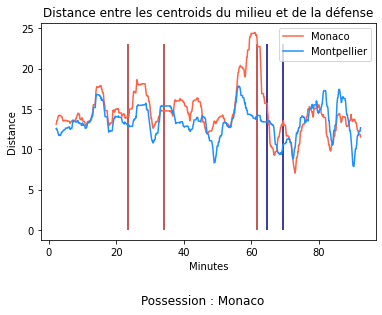

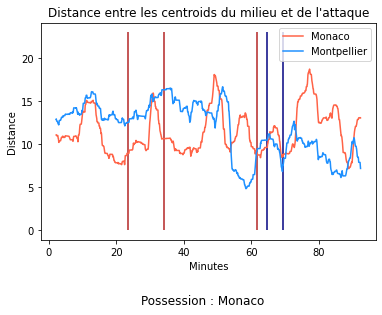

In [ ]:
centroids_asm=dataset_distances_centroids.loc[dataset_distances_centroids['Possession'] == 1]
plot_graphs_distance_centroids(centroids_asm,"la défense",3000,"Monaco")
plot_graphs_distance_centroids(centroids_asm,"l'attaque",3000,"Monaco")

# Ecart des joueurs à leur ligne

In [ ]:
liste_pos=np.c_[dataset['X'][0],dataset['Y'][0]]



liste_pos_def_mhsc=[liste_pos[i] for i in liste_milieu_mhsc]

from scipy import stats
def distance_ligne(liste):
  X,Y=explode_xy(liste)
  slope, intercept, r_value, p_value, std_err = stats.linregress(Y, X)
  p2=np.asarray([intercept,0])
  p1=np.asarray([slope*120+intercept,120])
  dist=[]
  for i in range(len(liste)):
    p3=np.asarray(liste[i])
    dist.append(np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1))
  moy=np.mean(dist)
  maxi=max(dist)
  return moy,maxi
distance_ligne(liste_pos_def_mhsc)



(3.012716201709759, 4.519074302564633)

In [ ]:
ecart_ligne_def_asm=[]
ecart_ligne_milieu_asm=[]
ecart_ligne_attaque_asm=[]

ecart_ligne_def_mhsc=[]
ecart_ligne_milieu_mhsc=[]
ecart_ligne_attaque_mhsc=[]

for i in range(len(dataset)):
  liste_pos=np.c_[dataset['X'][i],dataset['Y'][i]]

  liste_pos_def_asm=[liste_pos[i] for i in liste_def_asm]
  liste_pos_milieu_asm=[liste_pos[i] for i in liste_milieu_asm]
  liste_pos_attaque_asm=[liste_pos[i] for i in liste_attaque_asm]
  liste_pos_def_mhsc=[liste_pos[i] for i in liste_def_mhsc]
  liste_pos_milieu_mhsc=[liste_pos[i] for i in liste_milieu_mhsc]
  liste_pos_attaque_mhsc=[liste_pos[i] for i in liste_attaque_mhsc]

  ecart_ligne_def_asm.append(distance_ligne(liste_pos_def_asm))
  ecart_ligne_milieu_asm.append(distance_ligne(liste_pos_milieu_asm))
  ecart_ligne_attaque_asm.append(distance_ligne(liste_pos_attaque_asm))

  ecart_ligne_def_mhsc.append(distance_ligne(liste_pos_def_mhsc))
  ecart_ligne_milieu_mhsc.append(distance_ligne(liste_pos_milieu_mhsc))
  ecart_ligne_attaque_mhsc.append(distance_ligne(liste_pos_attaque_mhsc))




/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm


In [ ]:
dataset_defense_asm=pd.DataFrame(ecart_ligne_def_asm, columns=['ecart_ligne_def_asm_moyen','ecart_ligne_def_asm_max'])
dataset_milieu_asm=pd.DataFrame(ecart_ligne_milieu_asm, columns=['ecart_ligne_milieu_asm_moyen','ecart_ligne_milieu_asm_max'])
dataset_attaque_asm=pd.DataFrame(ecart_ligne_attaque_asm, columns=['ecart_ligne_attaque_asm_moyen','ecart_ligne_attaque_asm_max'])

dataset_defense_mhsc=pd.DataFrame(ecart_ligne_def_mhsc, columns=['ecart_ligne_def_mhsc_moyen','ecart_ligne_def_mhsc_max'])
dataset_milieu_mhsc=pd.DataFrame(ecart_ligne_milieu_mhsc, columns=['ecart_ligne_milieu_mhsc_moyen','ecart_ligne_milieu_mhsc_max'])
dataset_attaque_mhsc=pd.DataFrame(ecart_ligne_attaque_mhsc, columns=['ecart_ligne_attaque_mhsc_moyen','ecart_ligne_attaque_mhsc_max'])


In [ ]:
dataset_ecart_ligne=pd.concat([dataset,dataset_defense_asm,dataset_milieu_asm,dataset_attaque_asm,dataset_defense_mhsc,dataset_milieu_mhsc,dataset_attaque_mhsc],axis=1)

In [ ]:
dataset_ecart_ligne

,X,Y,X_ballon,Y_ballon,Time,Score,Possession,Minutes,Mi-Temps,defenseur_asm,defenseur_mhsc,ecart_ligne_def_asm_moyen,ecart_ligne_def_asm_max,ecart_ligne_milieu_asm_moyen,ecart_ligne_milieu_asm_max,ecart_ligne_attaque_asm_moyen,ecart_ligne_attaque_asm_max,ecart_ligne_def_mhsc_moyen,ecart_ligne_def_mhsc_max,ecart_ligne_milieu_mhsc_moyen,ecart_ligne_milieu_mhsc_max,ecart_ligne_attaque_mhsc_moyen,ecart_ligne_attaque_mhsc_max
0,"[32.978, 43.868, 51.976, 30.973, 38.538, 47.17...","[44.448, 37.283, 24.648, 30.483, 31.151, 25.26...",52.69,33.23,1610740800000,0,1,0.000000,1,32.280048,31.172039,3.624710,4.650213,4.335058,5.030970,6.038802e-15,6.157210e-15,3.293296,4.351798,3.012716,4.519074,9.325857e-16,1.036206e-15
1,"[32.979, 43.908, 52.001, 30.974, 38.531, 47.23...","[44.448, 37.293, 24.597, 30.485, 31.087, 25.30...",53.21,33.57,1610740800040,0,1,0.000652,1,32.291781,31.172807,3.634629,4.690910,4.331520,5.029258,6.867091e-15,7.103887e-15,3.308587,4.346819,3.050432,4.575649,5.151418e-15,5.299448e-15
2,"[32.98, 43.949, 52.025, 30.974, 38.525, 47.303...","[44.445, 37.305, 24.547, 30.489, 31.022, 25.34...",53.73,33.90,1610740800080,0,1,0.001305,1,32.302541,31.172356,3.645475,4.729871,4.326429,5.026190,3.314813e-15,3.314813e-15,3.321846,4.341514,3.088366,4.632549,1.480289e-16,2.960579e-16
3,"[32.981, 43.99, 52.048, 30.972, 38.519, 47.366...","[44.441, 37.319, 24.497, 30.493, 30.958, 25.39...",54.25,34.23,1610740800120,0,1,0.001957,1,32.315321,31.169919,3.656738,4.766239,4.320555,5.022893,1.420463e-15,1.420463e-15,3.332795,4.355664,3.126061,4.689091,2.782936e-15,2.960570e-15
4,"[32.982, 44.032, 52.071, 30.969, 38.514, 47.43...","[44.435, 37.335, 24.45, 30.497, 30.894, 25.433...",54.25,34.23,1610740800160,0,1,0.002610,1,32.327065,31.166488,3.668163,4.800253,4.313040,5.018127,5.681035e-15,5.681035e-15,3.341986,4.367202,3.163724,4.745587,8.881679e-16,1.125013e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145599,"[70.687, 44.395, 53.722, 82.68, 49.211, 63.925...","[38.133, 27.789, 31.519, 8.447, 44.234, 4.315,...",27.84,41.18,1610747404920,5,0,94.997390,2,39.779974,33.928428,6.464162,10.072730,3.821339,7.642678,1.220484e-14,1.220484e-14,8.966729,19.219350,4.442389,6.663583,4.143941e-15,4.499136e-15
145600,"[70.672, 44.318, 53.715, 82.586, 49.228, 63.80...","[38.145, 27.815, 31.515, 8.531, 44.233, 4.383,...",28.16,38.87,1610747404960,5,0,94.998043,2,39.595647,33.927236,6.502236,10.118025,3.858162,7.716323,6.033870e-15,1.206774e-14,8.968914,19.225990,4.462297,6.693446,1.776115e-15,2.131338e-15
145601,"[70.657, 44.241, 53.707, 82.492, 49.245, 63.69...","[38.157, 27.842, 31.511, 8.615, 44.231, 4.45, ...",28.55,36.01,1610747405000,5,0,94.998695,2,39.412326,33.926513,6.540294,10.162544,3.896040,7.792081,5.965050e-15,1.193010e-14,8.969935,19.230737,4.482113,6.723169,2.013051e-15,2.131466e-15
145602,"[70.643, 44.165, 53.7, 82.399, 49.264, 63.577,...","[38.168, 27.869, 31.507, 8.699, 44.229, 4.515,...",28.94,33.14,1610747405040,5,0,94.999348,2,39.229069,33.925592,6.578367,10.207128,3.934341,7.868682,5.896004e-15,1.179201e-14,8.970704,19.234841,4.502238,6.753356,3.019706e-15,3.197336e-15


In [ ]:
def plot_graphs_ecart_ligne(mon_dataset,localisation,size,equipe):
    fig = plt.figure()
    ax = plt.axes()
    x=mon_dataset['Minutes']
    if localisation == "defense" :
        asm=mon_dataset['ecart_ligne_def_asm_moyen']
        mhsc=mon_dataset['ecart_ligne_def_mhsc_moyen']
    elif localisation == "milieu":
        asm=mon_dataset['ecart_ligne_milieu_asm_moyen']
        mhsc=mon_dataset['ecart_ligne_milieu_mhsc_moyen']
    else :
        asm=mon_dataset['ecart_ligne_attaque_asm_moyen']
        mhsc=mon_dataset['ecart_ligne_attaque_mhsc_moyen']

    window_size=size
    asm=asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
    mhsc=mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Distance')
    ax.set_title('Distance entre les joueurs et leur ligne ' + localisation)
    plt.plot(x, asm, color='tomato')
    plt.plot(x,mhsc, color='dodgerblue')
    plt.legend(['Monaco', 'Montpellier'])
    plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],0,10,color='navy')
    plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],0,10,color='firebrick')
    txt="Possession : " + equipe
    plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

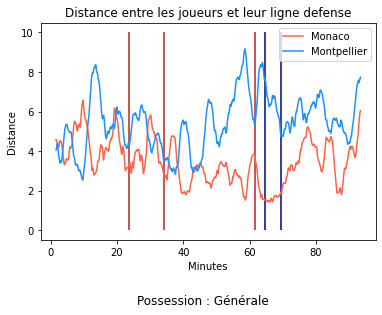

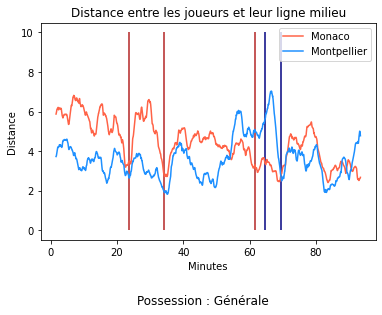

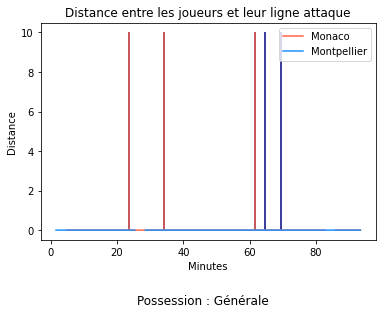

In [ ]:
plot_graphs_ecart_ligne(dataset_ecart_ligne,"defense",5000,'Générale')
plot_graphs_ecart_ligne(dataset_ecart_ligne,"milieu",5000,'Générale')
plot_graphs_ecart_ligne(dataset_ecart_ligne,"attaque",5000,'Générale')

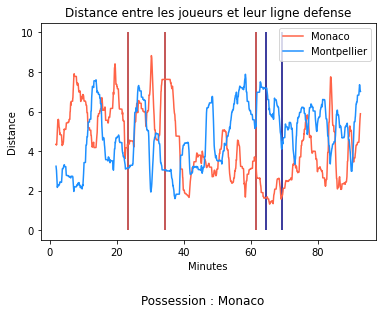

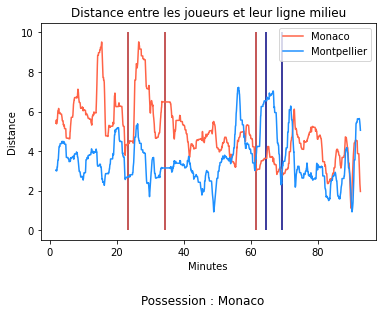

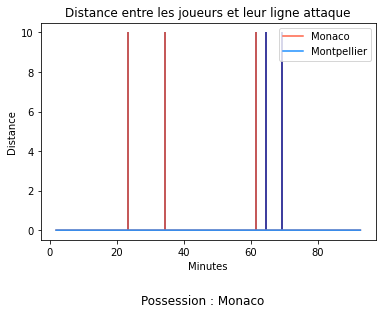

In [ ]:
ecart_ligne_asm=dataset_ecart_ligne.loc[dataset_ecart_ligne['Possession'] == 1]
plot_graphs_ecart_ligne(ecart_ligne_asm,"defense",2000,'Monaco')
plot_graphs_ecart_ligne(ecart_ligne_asm,"milieu",2000,'Monaco')
plot_graphs_ecart_ligne(ecart_ligne_asm,"attaque",2000,'Monaco')

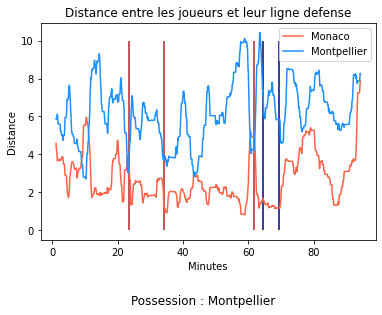

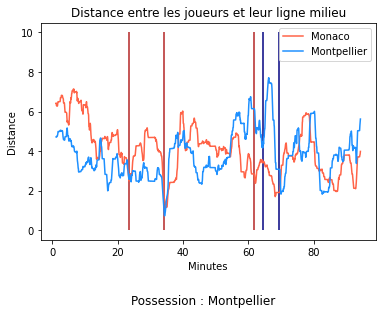

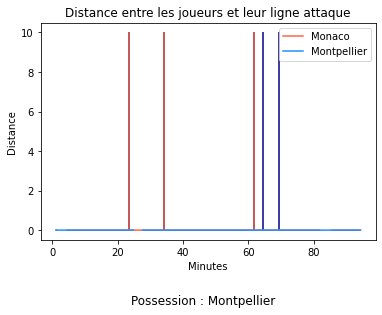

In [ ]:
ecart_ligne_mhsc=dataset_ecart_ligne.loc[dataset_ecart_ligne['Possession'] == 0]
plot_graphs_ecart_ligne(ecart_ligne_mhsc,"defense",2000,'Montpellier')
plot_graphs_ecart_ligne(ecart_ligne_mhsc,"milieu",2000,'Montpellier')
plot_graphs_ecart_ligne(ecart_ligne_mhsc,"attaque",2000,'Montpellier')

https://www.nature.com/articles/s41598-019-48623-1.pdf

faire la différence entre les courbes similaires / l'addition

triangulation de delaunay

transformée de hilbert



# Decalage de phase

In [ ]:
from scipy import signal, fftpack
import numpy
delay_asm=[]
delay_mhsc=[]
for i in range(len(dataset_centroids)-125):
  asm=dataset_centroids['centroids_asm'][i:i+125]
  mhsc=-dataset_centroids['centroids_mhsc'][i:i+125]

  A = fftpack.fft(np.array(asm))
  B = fftpack.fft(np.array(mhsc))
  Ar = -A.conjugate()
  Br = -B.conjugate()
  delay_asm.append(numpy.argmax(numpy.abs(fftpack.ifft(Ar*B)))*0.04)
  delay_mhsc.append(numpy.argmax(numpy.abs(fftpack.ifft(A*Br)))*0.04)


In [ ]:
dataset_decalage=pd.DataFrame(list(zip(delay_asm,delay_mhsc)), columns=["delay_asm",'delay_mhsc'])

In [ ]:
dataset_decalage

,delay_asm,delay_mhsc
0,2.76,2.24
1,2.76,2.24
2,2.76,2.24
3,2.76,2.24
4,2.72,2.28
...,...,...
145474,2.24,2.76
145475,2.24,2.76
145476,2.28,2.72
145477,2.28,2.72


In [ ]:
dataset_decalage=pd.concat([dataset_centroids[0:144419],dataset_decalage],axis=1)

In [ ]:
def plot_graphs_centroids(mon_dataset,size,equipe):

  fig = plt.figure()
  ax = plt.axes()
  x=mon_dataset['Minutes']
  asm=mon_dataset['delay_asm']
  mhsc=mon_dataset['delay_mhsc']
  window_size=size
  asm=asm.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  mhsc=mhsc.rolling(window= window_size, win_type="gaussian",center=True).mean(std=window_size / 2.).to_numpy()
  ax.set_xlabel('Minutes')
  ax.set_ylabel('Decalage de phase')
  ax.set_title('Evolution du decalage de phase entre les deux équipes')
  plt.plot(x,asm, color='tomato')
  plt.plot(x,mhsc, color='dodgerblue')
  plt.legend(['Monaco', 'Montpellier'])
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_mhsc)]['Minutes'],1.4,2.8,color='navy')
  plt.vlines(dataset.loc[dataset['Time'].isin(buts_asm)]['Minutes'],1.4,2.8,color='firebrick')
  txt="Possession : " + equipe
  plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

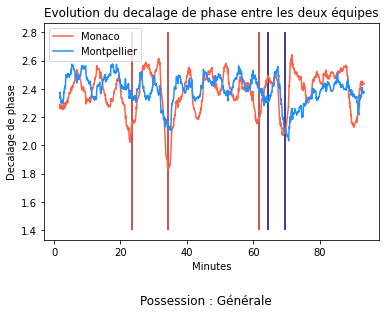

In [ ]:
plot_graphs_centroids(dataset_decalage,5000,'Générale')

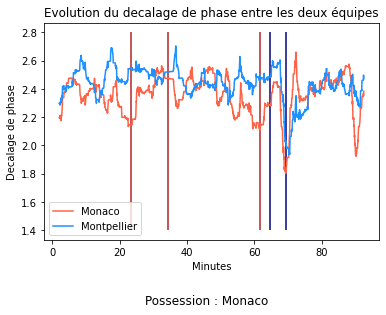

In [ ]:
dataset_decalage_asm=dataset_decalage.loc[dataset_decalage['Possession'] == 1]
plot_graphs_centroids(dataset_decalage_asm,3000,'Monaco')

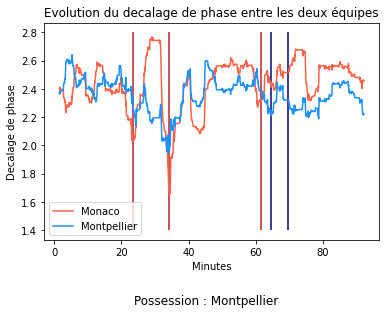

In [ ]:
dataset_decalage_mhsc=dataset_decalage.loc[dataset_decalage['Possession'] == 0]
plot_graphs_centroids(dataset_decalage_mhsc,3000,'Montpellier')